# Homework 5
### Three Observed Trends:
#### *urban cities not only have more drivers, they have lower fares on average.  But we can't say if that's 
####  because of increased competetion or because rides in urban cities tend to be shorter.
#### *looking at the bubble plot, there's clearly a negative correlation between average fare and number of rides 
####  per city. Which makes sense because people are more likely to take a car service if it's cheaper.
#### *there's also a negative correlation between the number of drivers and the average fare. 
####  (i.e. increased drivers mean lower fares)

In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as ssn
import matplotlib.patches as mpatches
plt.rcParams['axes.facecolor'] = 'whitesmoke'

In [25]:
#import our data
city_data = pd.read_csv("city_data.csv")

ride_data = pd.read_csv("ride_data.csv")

In [31]:
#iterate through the cities alphabetically to collect their types and driver count
bubble_city=city_data.pivot_table(index=["city","type"],values=["driver_count"],
                                   aggfunc={"driver_count":np.mean},fill_value=0)
color_dic={"Urban":"crimson","Suburban":"purple","Rural":'blue'}
color_list=[]
area_list=[]
for i, row in bubble_city.iterrows():
    color_list.append(color_dic[i[1]])
    area_list.append(row["driver_count"]*12)

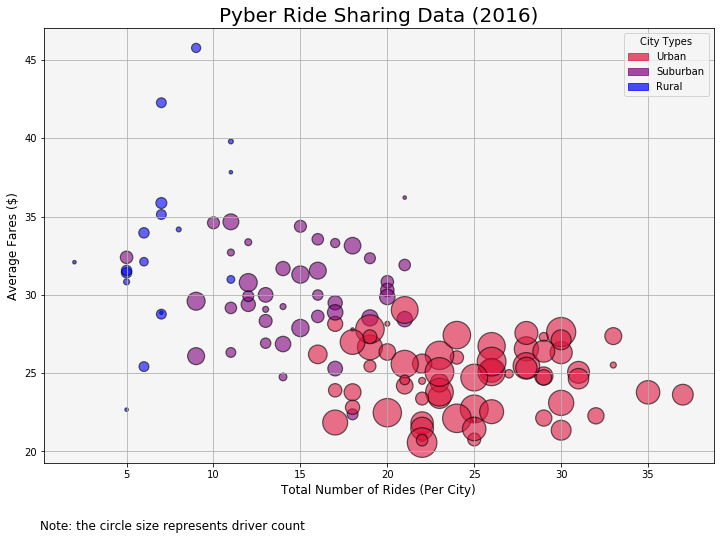

In [45]:
#graph the legend manually
patch_1=mpatches.Patch(color="crimson", label='Urban', alpha=0.7)
patch_2=mpatches.Patch(color="purple", label='Suburban', alpha=0.7)
patch_3=mpatches.Patch(color='blue', label='Rural', alpha=0.7)

#graph the actual data
bubble_rides=ride_data.pivot_table(index=["city"],values=["fare","ride_id"],
                                   aggfunc={"fare":np.mean,"ride_id":len},fill_value=0)
plt.figure(figsize=(12,8))
plt.scatter(bubble_rides["ride_id"], bubble_rides["fare"], s=area_list, 
            color=color_list, alpha=0.6, edgecolors="black", linewidth=1.2,label="Urban")
#matplotlib.set_facecolor("lightslategray")
plt.legend()
plt.title("Pyber Ride Sharing Data (2016)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fares ($)", fontsize=12)
plt.text(0,15, "Note: the circle size represents driver count", fontsize=12)
plt.grid(True)
plt.legend(handles=[patch_1, patch_2, patch_3], title="City Types")
plt.show()

In [351]:
#gather the appropriate data for my pie charts
cities= ["Urban","Suburban","Rural"]

def extractData(city):
    city_df=merge_table.loc[merge_table["type"] == city]
    city_grouped=city_df.groupby("city").mean()
    city_drivers=city_grouped["driver_count"]
    city_fares=city_grouped["fare"]
    city_driver_count=city_grouped["driver_count"].sum()
    city_num_rides=city_df.shape[0]
    city_fares_sum=city_df["fare"].sum()
    return [city_driver_count, city_num_rides, city_fares_sum]

city_dic={"Urban":"","Suburban":"","Rural":""}
for city in cities:
    city_dic[city]=extractData(city)

### Drivers by City Type

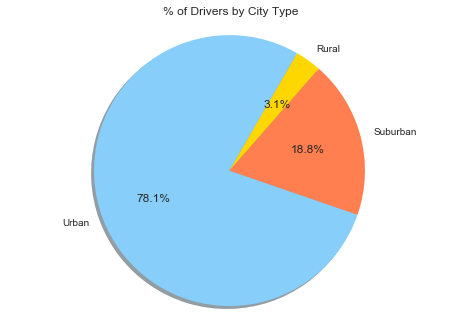

In [352]:
    #explode those two slices
labels = ["Urban","Suburban","Rural"]
drivers_by_city = [city_dic["Urban"][0], city_dic["Suburban"][0],city_dic["Rural"][0]]
colors = ['lightskyblue', 'coral','gold']
 
# Plot
plt.pie(drivers_by_city, labels=labels, colors=colors,  
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.title("% of Drivers by City Type")
plt.axis('equal')
plt.show()

### Rides by City Type

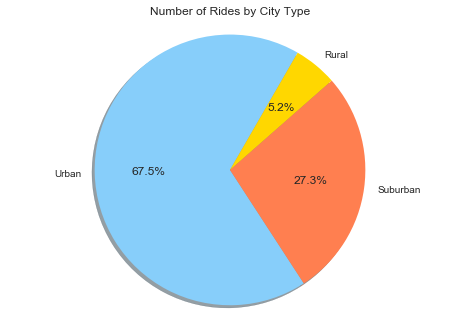

In [353]:
sizes = [city_dic["Urban"][1], city_dic["Suburban"][1],city_dic["Rural"][1]]
colors = ['lightskyblue', 'coral','gold']

# Plot
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.title("Number of Rides by City Type")
plt.axis('equal')
plt.show()

### Fares by City Type

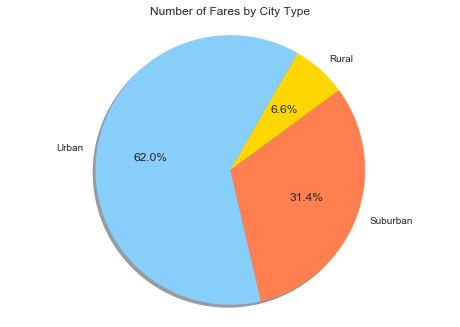

In [354]:
sizes = [city_dic["Urban"][2], city_dic["Suburban"][2],city_dic["Rural"][2]]
colors = ['lightskyblue', 'coral','gold']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.title("Number of Fares by City Type")
plt.axis('equal')
plt.show()